In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from category_encoders.ordinal import OrdinalEncoder


from imblearn.under_sampling import NearMiss

from sklearn.tree import DecisionTreeClassifier


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay,
                             mean_absolute_error,
                             accuracy_score,
                             recall_score,
                             f1_score,
                             auc,
                             roc_auc_score, roc_curve, log_loss)



from sklearn.neighbors import (KNeighborsClassifier,
                               RadiusNeighborsClassifier)

In [ ]:
col_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df = pd.read_csv('crx.data', names = col_names)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


<ipython-input-27-8a8a78969310>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


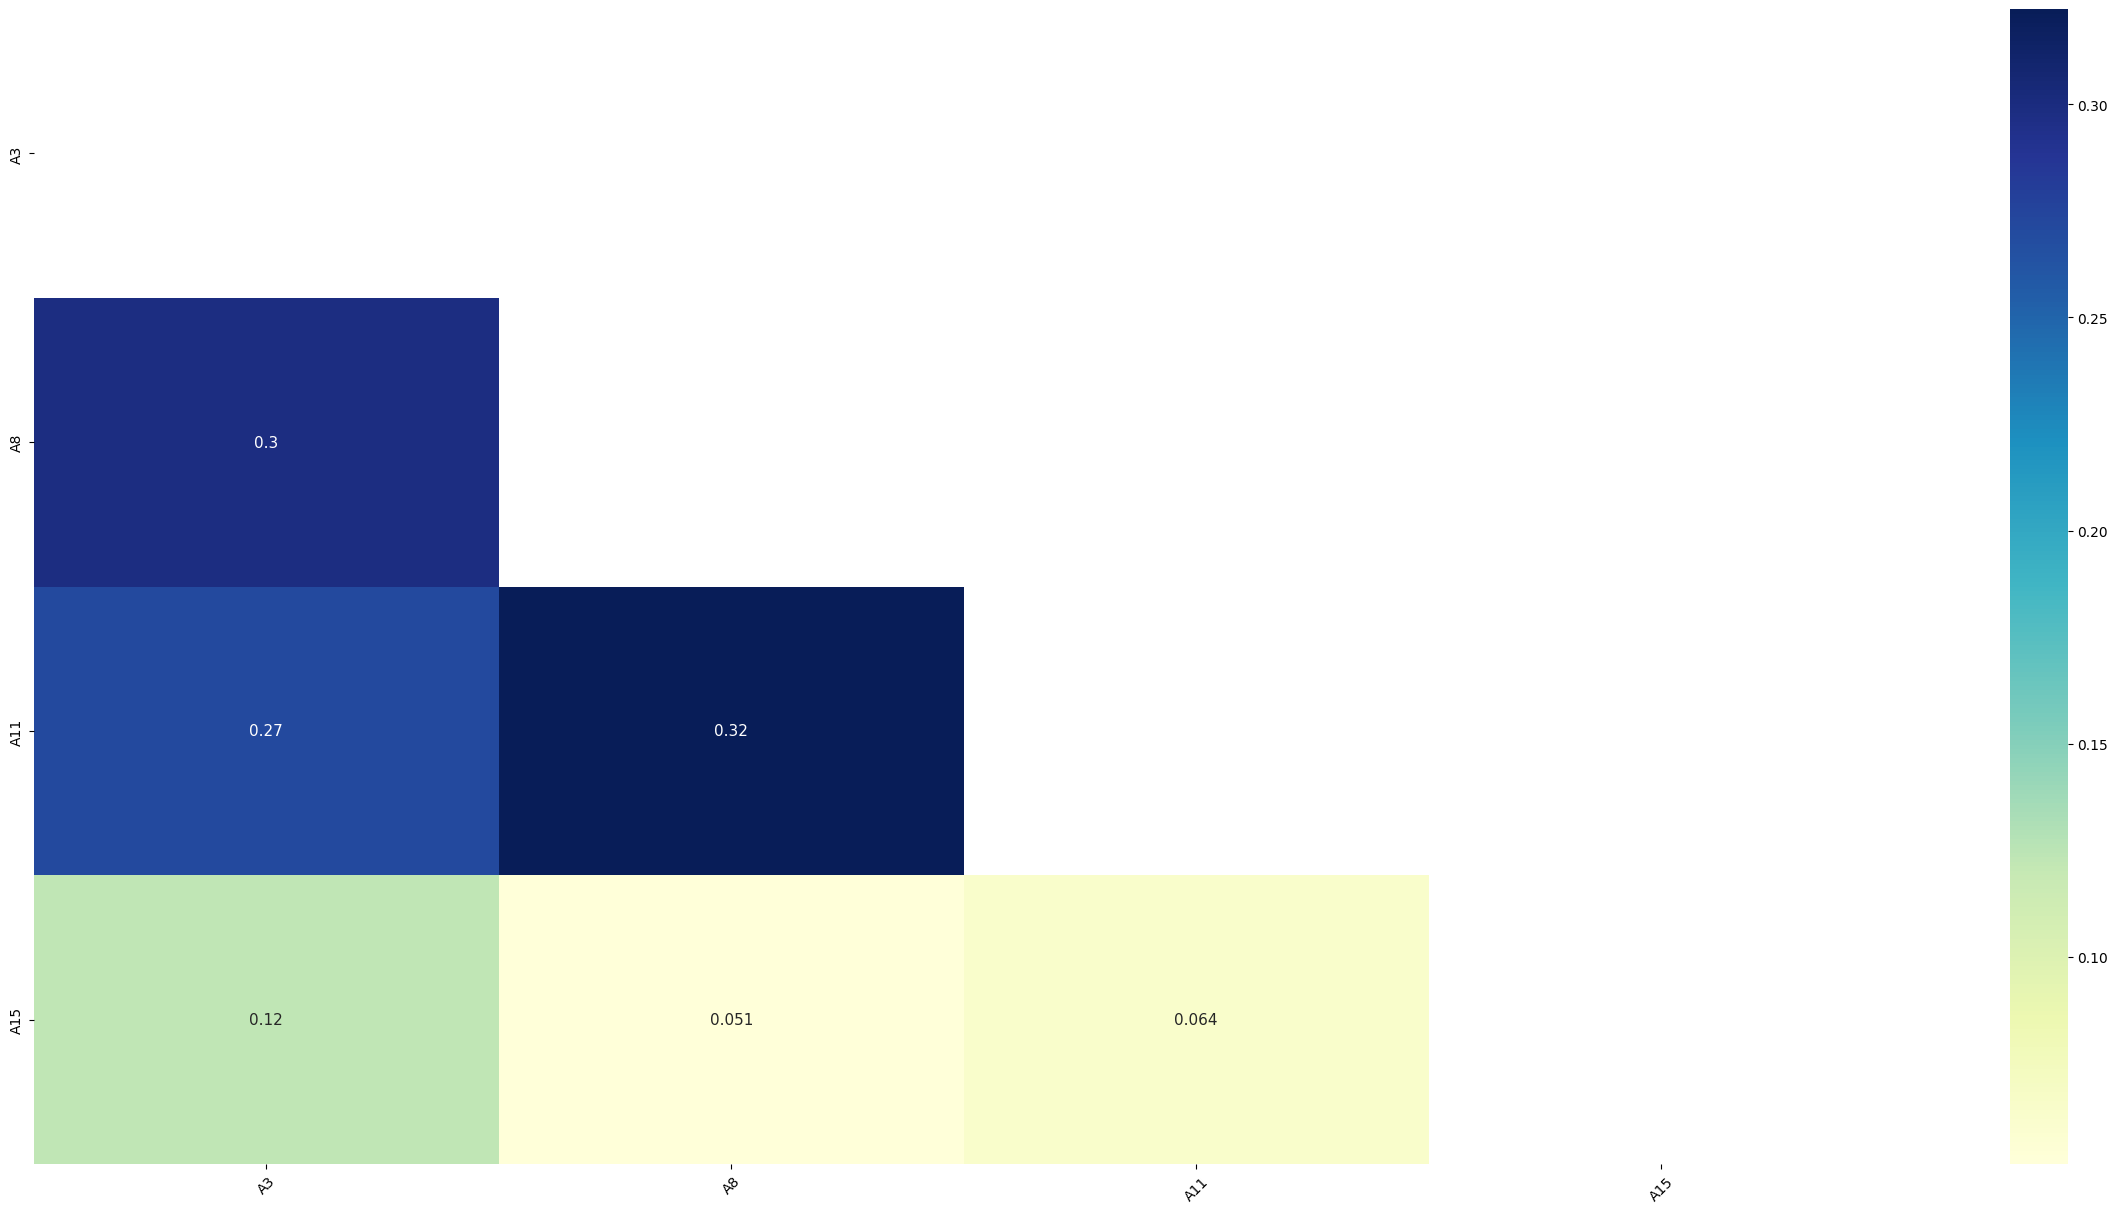

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(30, 15))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11}, mask=mask)
plt.xticks(rotation=45)
plt.show()

As we can see, the dependence of features is very low

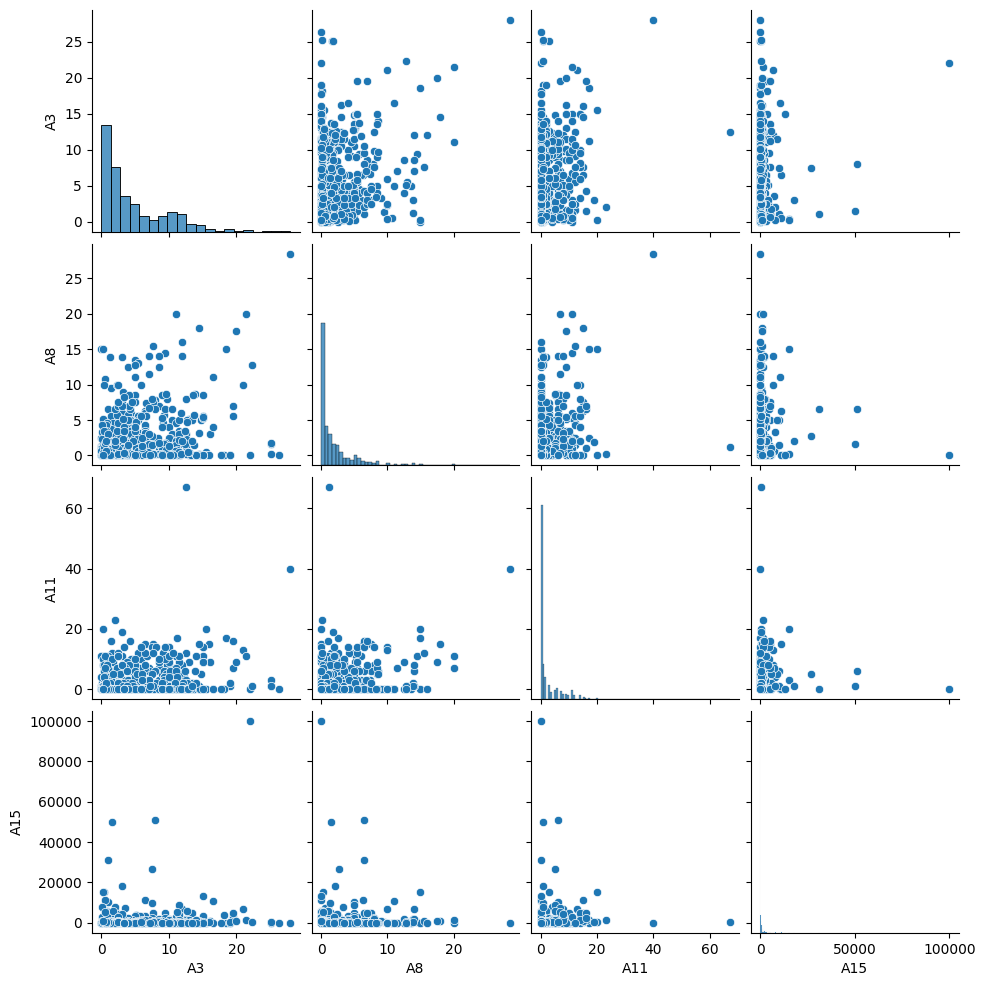

In [ ]:
sns.pairplot(data = df)

The distribution is asymmetric and we have a lot of outliers, so we are going to use RobustScaler

In [ ]:
df['A_sum'] = df['A3']+df['A8']+df['A11']+df['A15']

In [ ]:
df['!=0'] = df.apply(lambda x: 'yes' if all(x[['A3','A8','A11','A15']]!=0) else 'no', axis = 1)

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A_sum,!=0
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+,2.250,no
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+,573.500,yes
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+,826.000,no
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+,13.290,yes
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+,7.335,no


In [ ]:
enc = OrdinalEncoder()
df["A16"] = enc.fit_transform(df["A16"])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A_sum,!=0
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1,2.250,no
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1,573.500,yes
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1,826.000,no
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1,13.290,yes
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1,7.335,no


In [ ]:
X = df[['A3', 'A8', 'A11', 'A15']]

In [ ]:
y = df['A16']

In [ ]:
X_train_Ids, X_test_Ids = train_test_split(X.index, test_size = .3, random_state = 42, stratify = y)

In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X.loc[X_train_Ids])
X_test_scaled = scaler.transform(X.loc[X_test_Ids])

In [ ]:
from sklearn.metrics import make_scorer
dtc_model = DecisionTreeClassifier(random_state=42)
scorer = make_scorer(mean_squared_error, greater_is_better = False)
tree_params = {'max_depth': list(range(1,90)), "min_samples_leaf":list(range(1,10))}
cv_model = GridSearchCV(dtc_model, param_grid = tree_params, cv=5, scoring='accuracy').fit(X_train_scaled, y[X_train_Ids])
best_model = cv_model.best_estimator_
preds = best_model.predict(X_test_scaled)
tree_score = accuracy_score(y[X_test_Ids], preds)

In [ ]:
reg = LogisticRegression()
reg_params = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
cv_model = GridSearchCV(reg, param_grid = reg_params, cv=5, scoring = scorer).fit(X_train_scaled, y[X_train_Ids])
best_model = cv_model.best_estimator_
preds = best_model.predict(X_test_scaled)
reg_score = accuracy_score(y[X_test_Ids], preds)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
print('Accuracy for decision tree:' , tree_score, '\n',
      'Accuracy for logistic regression:' , reg_score, '\n', )

Accuracy for decision tree: 0.7294685990338164 
 Accuracy for logistic regression: 0.7439613526570048 

